In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [23]:
df = pd.read_csv("Data/admission.csv")

In [24]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [25]:
df.duplicated().sum()

np.int64(0)

In [26]:
df.drop(columns=["Serial No."], inplace=True)

In [37]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2,random_state=42)

In [38]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
249,321,111,3,3.5,4.0,8.83,1
433,316,111,4,4.0,5.0,8.54,0
19,303,102,3,3.5,3.0,8.50,0
322,314,107,2,2.5,4.0,8.27,0
332,308,106,3,3.5,2.5,8.21,1
...,...,...,...,...,...,...,...
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0
435,309,105,2,2.5,4.0,7.68,0


In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [56]:
model = Sequential()

model.add(Dense(7,activation="relu", input_dim=7))
model.add(Dense(7,activation="relu", input_dim=7))
model.add(Dense(1,activation="linear"))




c:\Users\nyc-Twice\Code\mlibs\mlibs\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [77]:
model.compile(loss="mean_squared_error",metrics=["accuracy","mse"],optimizer="adam")

In [78]:
history = model.fit(x_train_scaled,y_train, validation_split=0.2,epochs=100)

Epoch 1/100


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.0000e+00 - loss: 0.0049 - mse: 0.0049 - val_accuracy: 0.0000e+00 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0000e+00 - loss: 0.0048 - mse: 0.0048 - val_accuracy: 0.0000e+00 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: 0.0048 - mse: 0.0048 - val_accuracy: 0.0000e+00 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 0.0048 - mse: 0.0048 - val_accuracy: 0.0000e+00 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: 0.0047 - mse: 0.0047 - val_accuracy: 0.0000e+00 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: 0.0047 - mse: 0.0047 - val_accuracy: 0.0000e+00 - val_loss: 0.0031 - val_mse: 0.0031
Epoc

In [79]:
y_pred = model.predict(x_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [80]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7948594175030976

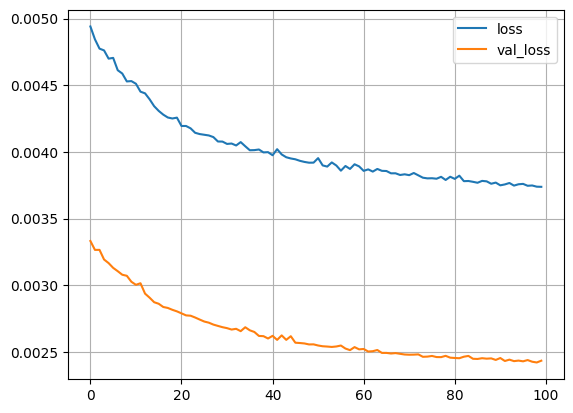

In [81]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.legend()
plt.grid()
plt.show()

**Accuracy is a useless metric for regression that i swhy we use mse or rmse**

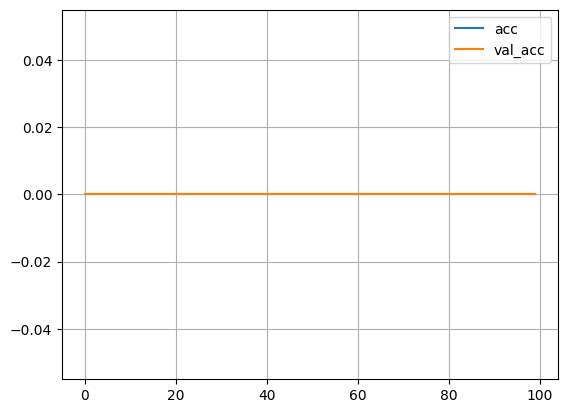

In [82]:
plt.plot(history.history["accuracy"], label="acc")
plt.plot(history.history["val_accuracy"],label="val_acc")
plt.legend()
plt.grid()
plt.show()

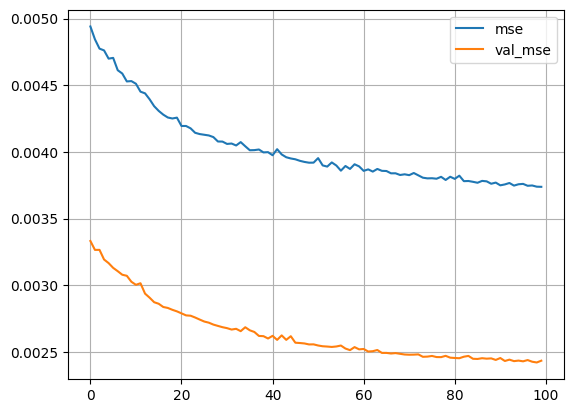

In [84]:
plt.plot(history.history["mse"], label="mse")
plt.plot(history.history["val_loss"],label="val_mse")
plt.legend()
plt.grid()
plt.show()